In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from scipy import stats

# Purpose of this notebook
I used this notebook to look at sampling target location for the robotic reaching task. Notice that the second part of it generates points from the kinematics as opposed to a sphere

In [153]:
samples = 10000


data = np.zeros((samples, 3))
#r = 1.0
for i in range(samples):
    r = np.random.uniform(0.5, 1)
    theta = np.random.uniform(0, 2 * np.pi)
    u = np.random.uniform(0.0, 0.75 )
    
    phi = np.arccos(1-u)
    
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    data[i,:] = np.array([x, y, z])

In [154]:
kde = stats.gaussian_kde(data.T)
density = kde(data.T)

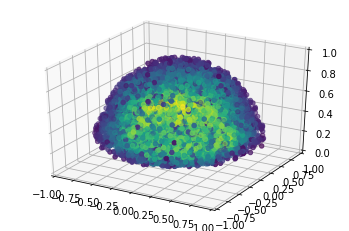

In [155]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data = data.T
ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-0, 1))
ax.scatter(data[0], data[1], data[2], c = density.T)  

In [156]:
np.array([156.4, 128.4, 410.0, 208.4, 105.9, 61.5]).sum()

1070.6

In [158]:
from environments.DHKinematics import DHKinematics

In [160]:
kin = DHKinematics(
    np.array([0.0, 2.2497, 0.0, 2.5796, 0.0, 2.0996, 0.0]),
    True)



In [162]:
np.linalg.norm(kin.calcEndEffector())

0.3439322765799862

In [180]:
samples = 10000
kin = DHKinematics(
    np.array([0.0, 2.2497, 0.0, 2.5796, 0.0, 2.0996, 0.0]),
    True)
data = np.zeros((samples, 3))
#r = 1.0
for i in range(samples):
    angles = np.random.uniform(-2.0997, 2.0997, 7)
    #angles = np.random.randn(7) * 2.0997
    kin.set_thetas(angles)
    data[i,:] = kin.calcEndEffector()
    
    

In [181]:
kde = stats.gaussian_kde(data.T)
density = kde(data.T)

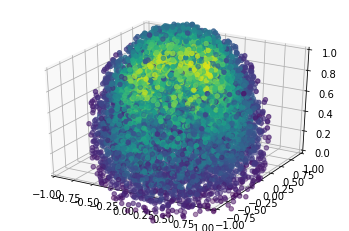

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data = data.T
ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-0, 1))
ax.scatter(data[0], data[1], data[2], c = density.T)  